# 3.1 - Regresion Lineal (ing. carac.)

**Ecuacion de la recta**

$$y = m·x+b$$

In [1]:
import pandas as pd
import pylab as plt

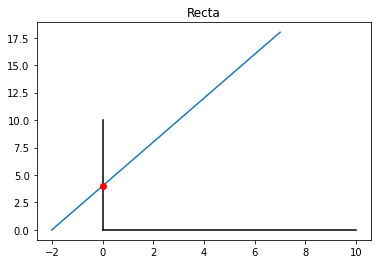

In [2]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

**Generalizacion de la ecuacion de la recta**

$$y=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\ldots+\beta_nx_n$$

El objetivo de la regresion lineal es obtener los $\beta$:
+ Algebraicamente: $\beta = (X^{T}X)^{-1}X^{T}Y$
+ Minimos cuadrados

In [3]:
from scipy.stats import linregress

import statsmodels.api as sm
from statsmodels.formula.api import ols

import pandas as pd
import numpy as np

In [4]:
auto=pd.read_csv('../data/auto-mpg.csv')

auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [5]:
auto=auto.dropna()

In [6]:
#help(linregress)

In [7]:
y=auto.mpg

x=auto.acceleration

linreg=linregress(x, y)

linreg

LinregressResult(slope=1.1976241877320564, intercept=4.833249804843792, rvalue=0.4233285369027874, pvalue=1.7785761248041197e-18, stderr=0.12978590154345085)

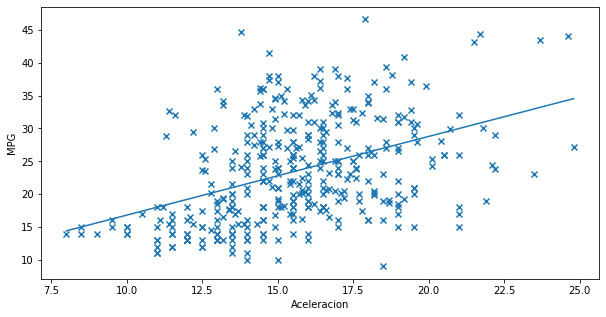

In [8]:
# plot

x_=np.linspace(x.min(), x.max(), 50)

y_=linreg[0]*x_ + linreg[1]   # y=m·x+b

plt.figure(figsize=(10, 5))
plt.plot(x_, y_, label=f'mpg={linreg[0]}·acc+{linreg[1]}')
plt.scatter(x, y, marker='x')

plt.xlabel('Aceleracion')
plt.ylabel('MPG');

In [9]:
linreg[2]**2    # R2, coeficiente de determinacion

0.17920705015625463

In [10]:
# linreg con statsmodels

import warnings
warnings.simplefilter('ignore')

x=sm.add_constant(auto.acceleration)

y=auto.mpg

modelo=sm.OLS(y, x).fit()  # esto es la regresion lineal

In [11]:
pred=modelo.predict(x)
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     85.15
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.78e-18
Time:                        10:01:10   Log-Likelihood:                -1322.5
No. Observations:                 392   AIC:                             2649.
Df Residuals:                     390   BIC:                             2657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.8332      2.048      2.359      0.019       0.806       8.861
acceleration     1.1976      0.130      9.228      0.000       0.942       1.453
==============================================================================
Omnibus:                       16.649   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.415
Skew:                           0.492   Prob(JB):                     0.000165
Kurtosis:                       2.684   Cond. No.                         90.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# varias variables

x=sm.add_constant(auto[[
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
]].apply(lambda x: x.fillna(x.mean())))

In [19]:
modelo=sm.OLS(y, x).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     819.5
Date:                Wed, 26 May 2021   Prob (F-statistic):          3.33e-140
Time:                        10:07:02   Log-Likelihood:                -1037.6
No. Observations:                 392   AIC:                             2081.
Df Residuals:                     389   BIC:                             2093.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.3473      4.007     -3.581      0.000     -22.224      -6.470
weight        -0.0066      0.000    -30.911      0.000      -0.007      -0.006
model_year     0.7573      0.049     15.308      0.000       0.660       0.855
==============================================================================
Omnibus:                       42.504   Durbin-Watson:                   1.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.997
Skew:                           0.670   Prob(JB):                     2.32e-16
Kurtosis:                       4.616   Cond. No.                     7.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**version sklearn**

In [ ]:
!pip install scikit-learn

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [40]:
x=auto[[
    #'acceleration',
    #'cylinders',
    'weight',
    #'horse_power',
    'model_year',
    #'displacement'
]]

y=auto.mpg

In [41]:
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [42]:
x.head()

,weight,model_year
0,3504,70
1,3693,70
2,3436,70
3,3433,70
4,3449,70


In [43]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [44]:
modelo=LinearRegression()

In [45]:
#help(modelo)

In [46]:
modelo.fit(x, y)   # entrena el modelo, sacame las betas

LinearRegression()

In [48]:
x_test=[[3449, 70]]

modelo.predict(x_test)  # evaluamos, aplicamos la ecuacion de la recta con las betas

array([15.79099897])

In [49]:
pred=modelo.predict(x)

In [55]:
pred[:10]

array([15.42623483, 14.1727726 , 15.87721595, 15.89711217, 15.79099897,
        9.87518781,  9.78897083, 10.06751799,  9.31809348, 13.13153678])

In [51]:
r2_score(y, pred)  # esto dice que podemos explicar el 80% de la varianza con las X que tenemos

0.8081803058793997

In [52]:
modelo.intercept_      # beta0, ordenada en el origen

-14.347253017615866

In [53]:
modelo.coef_          # el resto de betas

array([-0.00663208,  0.75731828])

In [54]:
x.columns

Index(['weight', 'model_year'], dtype='object')

In [ ]:
# mpg = -0.00663208*weight + 0.75731828*model_year - 14.347253017615866

# y = b1x1 + b2x2 + b0